# Exploring the scraped data

In [1]:
import numpy as np
import pandas as pd
import re
import sqlite3
import time
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
db_armenpress = sqlite3.connect("Armenpress/scraping.db")
db_newsam = sqlite3.connect("Newsam/scraping.db")
db_tertam = sqlite3.connect("Tertam/scraping.db")

In [3]:
df_armenpress = pd.read_sql_query("select * from article", db_armenpress)
df_newsam = pd.read_sql_query("select * from article", db_newsam)
df_tertam = pd.read_sql_query("select * from article", db_tertam)

In [4]:
df_tertam.time = pd.to_datetime(df_tertam.time)
df_newsam.time = pd.to_datetime(df_newsam.time)
df_armenpress.time = pd.to_datetime(df_armenpress.time)

In [5]:
df_armenpress

,id,headline,time,content,feedback
0,218011,AREMNIAN PRESIDENT SERZH SARGSYAN RECEIVES EXE...,2009-06-08 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Armenian President...","{\n ""entities"": [\n {\n ""name"": ""Serz..."
1,218012,ISSUES ON DEVELOPMENT OF AGRICULTURE SPHERE DI...,2009-06-08 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Director of the Co...","{\n ""entities"": [\n {\n ""name"": ""Davi..."
2,218013,CREDIT AGREEMENT OF 25 MILLION USD SIGNED WITH...,2009-06-04 00:00:00,"YEREVAN, JUNE 5, ARMENPRESS:The credit agreeme...","{""entities"": [\n {""name"": ""World Bank"", ""sent..."
3,218014,INTERNATIONAL OBSERVERS REGISTER THAT THE GENE...,2008-12-30 00:00:00,"YEREVAN, JUNE 1, ARMENPRESS:The observing miss...","{\n ""entities"": [\n {""name"": ""CoE Congress..."
4,218015,MATTHEW BRYZA SAYS OSCE MINSK GROUP CO-CHAIRS ...,2009-06-01 00:00:00,"BAKU, JUNE 1, ARMENPRESS:OSCE Minsk group is o...","{\n ""entities"": [\n {\n ""name"": ""Matt..."
...,...,...,...,...,...
144134,1124334,Armenia and Tunisia to lift visa requirements ...,2023-11-17 11:06:31,"YEREVAN, NOVEMBER 17, ARMENPRESS. Armenia and ...",None
144135,1124335,Shoghakat Vardanyan’s war documentary ‘1489’ w...,2023-11-17 11:20:02,"YEREVAN, NOVEMBER 17, ARMENPRESS. Armenian fil...",None
144136,1124340,"Daniel Hilaire: “At Fast Bank, we are continuo...",2023-11-17 11:49:17,"YEREVAN, NOVEMBER 17, ARMENPRESS. Digital bank...",None
144137,1124341,Yerevan police officer injured while respondin...,2023-11-17 11:51:28,"YEREVAN, NOVEMBER 17, ARMENPRESS. One of the t...",None


In [6]:
df_newsam

,id,headline,time,content,feedback,region,theme
0,166,Armenians no more move abroad for an employmen...,2009-06-25 12:37:00,“The number of Armenians leaving for temporary...,None,Armenia,"Economics , Society"
1,169,War not over for Azerbaijan,2009-06-25 13:16:00,Congratulating Azerbaijani servicemen’ profess...,None,"Armenia , Karabakh , Azerbaijan",Politics
2,178,Armenian authorities forgot about World Refuge...,2009-06-26 07:02:00,"Lragir reports that about 400,000 Armenians fl...",None,"Armenia , Karabakh , Azerbaijan","Politics , Society"
3,187,Mad scramble rather than a brawl,2009-06-26 10:02:00,"Kiro Manoyan, one of the ARF executives, was a...",None,Armenia,Politics
4,193,Expert: Armenian Government makes crisis worse,2009-06-26 10:50:00,"Andranik Tevanian, chairman of the Politeconom...",None,Armenia,"Politics , Economics"
...,...,...,...,...,...,...,...
219396,794062,Armenia abstains from voting on 2 of 3 resolut...,2023-11-23 16:51:53,Armenia abstained from the debates on two of t...,None,"World News , Armenia , Russia",Politics
219397,794069,Azerbaijan MFA confirms attendance to planned ...,2023-11-23 17:27:44,The Ministry of Foreign Affairs (MFA) of Azerb...,None,"Armenia , Azerbaijan",Politics
219398,794070,Aleksandr Volfovich: Armenia has not blocked a...,2023-11-23 17:14:19,Armenia did not block any decision of the CSTO...,None,"World News , Armenia , Russia",Politics
219399,794077,Ardshinbank and Dalan Technopark have signed a...,2023-11-23 16:45:17,Ardshinbank and Dalan Technopark have announce...,None,Armenia,Economics


In [7]:
df_tertam

,id,headline,time,content,feedback,categories
0,2010/03/02/animals/113853,It’s Raining Cats and Dogs in Community Budget...,2010-03-02 17:53:00,In a reference to a new fee to be paid for kee...,None,
1,2010/03/03/trtdink/114287,Turkish Broadcaster TRT to Pay Reparations to ...,2010-03-03 16:12:00,Turkish state broadcaster TRT has been ordered...,None,Event
2,2010/03/03/obama1/114145,Obama’s Position Remains Unchanged on the Arme...,2010-03-03 15:22:00,The United States are in support of the facts ...,"{\n ""entities"": [\n {\n ""name"": ""Obam...",
3,2010/03/03/congress/114138,Delegation of Armenian MPs Go to Washington on...,2010-03-03 14:55:00,"On March 3, a number of Armenian MPs left for ...",None,
4,2010/03/03/star/114120,Star Supermarket to Open 5 More Stores in Armenia,2010-03-03 14:09:00,Armenia’s local network of Star supermarkets h...,None,Economy
...,...,...,...,...,...,...
84375,2023/11/20/Ucom/4035510,Armenia's fastest home internet now live in Ij...,2023-11-20 18:58:00,Ucom now offers the fastest home internet and ...,None,Event
84376,2023/11/23/zangezur-mining/4037175,"Yershova, the new shareholder of the Zangezur ...",2023-11-23 15:16:00,"At the beginning of November, Tert.am reported...","{\n ""entities"": [\n {\n ""name"": ""Yers...",Economy
84377,2023/11/24/zangezur-combinat/4037753,Some enterprises of the Trotsenko-Ershova busi...,2023-11-24 21:44:00,Yesterday Tert.am wrote that the Zangezur Co...,None,Economy
84378,2023/11/24/tourism/4037866,Tourism as a 'Bread Basket' for the Country: T...,2023-11-24 16:00:00,"After the coronavirus and the war situation, t...",None,Economy


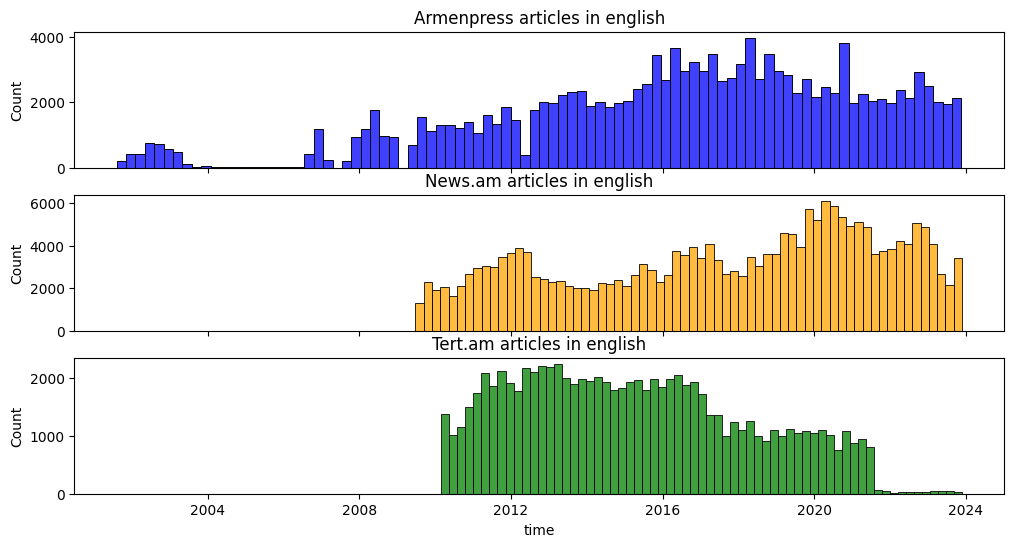

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
plt.title("test")
sns.histplot(df_armenpress, x="time", color="blue", ax=ax[0])
ax[0].set_title("Armenpress articles in english")
sns.histplot(df_newsam, x="time", color="orange", ax=ax[1])
ax[1].set_title("News.am articles in english")
sns.histplot(df_tertam, x="time", color="green", ax=ax[2])
ax[2].set_title("Tert.am articles in english");

In [25]:
(feedbacked_a := df_armenpress[~df_armenpress.feedback.isna()].copy())

,id,headline,time,content,feedback
0,218011,AREMNIAN PRESIDENT SERZH SARGSYAN RECEIVES EXE...,2009-06-08 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Armenian President...","{\n ""entities"": [\n {\n ""name"": ""Serz..."
1,218012,ISSUES ON DEVELOPMENT OF AGRICULTURE SPHERE DI...,2009-06-08 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Director of the Co...","{\n ""entities"": [\n {\n ""name"": ""Davi..."
2,218013,CREDIT AGREEMENT OF 25 MILLION USD SIGNED WITH...,2009-06-04 00:00:00,"YEREVAN, JUNE 5, ARMENPRESS:The credit agreeme...","{""entities"": [\n {""name"": ""World Bank"", ""sent..."
3,218014,INTERNATIONAL OBSERVERS REGISTER THAT THE GENE...,2008-12-30 00:00:00,"YEREVAN, JUNE 1, ARMENPRESS:The observing miss...","{\n ""entities"": [\n {""name"": ""CoE Congress..."
4,218015,MATTHEW BRYZA SAYS OSCE MINSK GROUP CO-CHAIRS ...,2009-06-01 00:00:00,"BAKU, JUNE 1, ARMENPRESS:OSCE Minsk group is o...","{\n ""entities"": [\n {\n ""name"": ""Matt..."
...,...,...,...,...,...
144078,1124166,People who have left Nagorno-Karabakh have the...,2023-11-15 10:57:47,"YEREVAN, NOVEMBER 15, ARMENPRESS. The United S...","{\n ""entities"": [\n {\n ""name"": ""Nago..."
144104,1124247,U.S. developing record of what happened in Nag...,2023-11-16 10:39:02,"YEREVAN, NOVEMBER 16, ARMENPRESS. The United S...","{\n ""entities"": [\n {\n ""name"": ""Unit..."
144115,1124285,Forbes Russia names FLYONE ARMENIA as one of t...,2023-11-16 16:05:18,"YEREVAN, NOVEMBER 16, ARMENPRESS. FLYONE ARMEN...","{\n ""entities"": [\n {""name"": ""FLYONE ARMEN..."
144116,1124286,Azerbaijan rejects Washington-mediated meeting...,2023-11-16 16:16:00,"YEREVAN, NOVEMBER 16, ARMENPRESS. Azerbaijan h...","{\n ""entities"": [\n {\n ""name"": ""Azer..."


In [33]:
feedbacked_a["negative_russia"] = 0
feedbacked_a["neutral_russia"] = 0
feedbacked_a["positive_russia"] = 0
rus = feedbacked_a.headline.str.contains("Russia")
(feedbacked_a_rus := feedbacked_a[rus])

,id,headline,time,content,feedback,negative_russia,neutral_russia,positive_russia
10122,522465,"YEREVAN, MARCH 17, ARMENPRESS: A deputy Russia...",2008-03-22 00:00:00,It said in Yerevan Grigory Karasik is expected...,"{\n ""entities"": [\n {\n ""name"": ""Grig...",0,0,0
10128,522473,"MOSCOW, MARCH 18, ARMENPRESS: Turkish prime mi...",2008-03-22 00:00:00,It quoted Erdogan as telling Medvedev that Tur...,"{\n ""entities"": [\n {""name"": ""Recep Tayyip...",0,0,0
10139,522488,"YEREVAN, MARCH 19, ARMENPRESS: President Rober...",2008-03-22 00:00:00,Kocharian’s press office said they spoke about...,"{\n ""entities"": [\n {""name"": ""Yerevan"", ""s...",0,0,0
10152,522502,"YEREVAN, MARCH 20, ARMENPRESS: Russia and Arme...",2008-03-22 00:00:00,"The agreement was signed by Gagik Khachatrian,...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,0,0
13936,582870,The eighth scientific-medical congress “Armeni...,2009-10-14 00:00:00,"1YEREVAN, OCTOBER 13, ARMENPRESS:The eighth sc...","{\n ""entities"": [\n {\n ""name"": ""Arme...",0,0,0
...,...,...,...,...,...,...,...,...
143919,1123663,Russia says it removed military equipment of p...,2023-11-07 15:09:19,"YEREVAN, NOVEMBER 7, ARMENPRESS. The Russian M...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,0,0
143976,1123825,Russia to send 40 tons of humanitarian aid for...,2023-11-09 16:50:43,"YEREVAN, NOVEMBER 9, ARMENPRESS. Russia will s...","{\n ""entities"": [\n {""name"": ""Russia"", ""se...",0,0,0
143995,1123888,Russia expresses readiness to host Armenian-Az...,2023-11-10 15:10:14,"YEREVAN, NOVEMBER 10, ARMENPRESS. Russia has r...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,0,0
144115,1124285,Forbes Russia names FLYONE ARMENIA as one of t...,2023-11-16 16:05:18,"YEREVAN, NOVEMBER 16, ARMENPRESS. FLYONE ARMEN...","{\n ""entities"": [\n {""name"": ""FLYONE ARMEN...",0,0,0


In [35]:
fb = feedbacked_a_rus.feedback
feedbacked_a.loc[rus, "negative_russia"] += fb.str.count("negative")
feedbacked_a.loc[rus, "neutral_russia"] += fb.str.count("neutral")
feedbacked_a.loc[rus, "positive_russia"] += fb.str.count("positive")

feedbacked_a[rus]

,id,headline,time,content,feedback,negative_russia,neutral_russia,positive_russia
10122,522465,"YEREVAN, MARCH 17, ARMENPRESS: A deputy Russia...",2008-03-22 00:00:00,It said in Yerevan Grigory Karasik is expected...,"{\n ""entities"": [\n {\n ""name"": ""Grig...",0,6,0
10128,522473,"MOSCOW, MARCH 18, ARMENPRESS: Turkish prime mi...",2008-03-22 00:00:00,It quoted Erdogan as telling Medvedev that Tur...,"{\n ""entities"": [\n {""name"": ""Recep Tayyip...",0,1,3
10139,522488,"YEREVAN, MARCH 19, ARMENPRESS: President Rober...",2008-03-22 00:00:00,Kocharian’s press office said they spoke about...,"{\n ""entities"": [\n {""name"": ""Yerevan"", ""s...",0,7,1
10152,522502,"YEREVAN, MARCH 20, ARMENPRESS: Russia and Arme...",2008-03-22 00:00:00,"The agreement was signed by Gagik Khachatrian,...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,9,0
13936,582870,The eighth scientific-medical congress “Armeni...,2009-10-14 00:00:00,"1YEREVAN, OCTOBER 13, ARMENPRESS:The eighth sc...","{\n ""entities"": [\n {\n ""name"": ""Arme...",0,2,10
...,...,...,...,...,...,...,...,...
143919,1123663,Russia says it removed military equipment of p...,2023-11-07 15:09:19,"YEREVAN, NOVEMBER 7, ARMENPRESS. The Russian M...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,5,0
143976,1123825,Russia to send 40 tons of humanitarian aid for...,2023-11-09 16:50:43,"YEREVAN, NOVEMBER 9, ARMENPRESS. Russia will s...","{\n ""entities"": [\n {""name"": ""Russia"", ""se...",0,3,4
143995,1123888,Russia expresses readiness to host Armenian-Az...,2023-11-10 15:10:14,"YEREVAN, NOVEMBER 10, ARMENPRESS. Russia has r...","{\n ""entities"": [\n {\n ""name"": ""Russ...",0,4,0
144115,1124285,Forbes Russia names FLYONE ARMENIA as one of t...,2023-11-16 16:05:18,"YEREVAN, NOVEMBER 16, ARMENPRESS. FLYONE ARMEN...","{\n ""entities"": [\n {""name"": ""FLYONE ARMEN...",0,2,5


In [36]:
feedbacked_a["negative_usa"] = 0
feedbacked_a["neutral_usa"] = 0
feedbacked_a["positive_usa"] = 0
usa = feedbacked_a.content.str.lower().str.contains("united states")
(feedbacked_a_usa := feedbacked_a[usa])

fb = feedbacked_a_usa.feedback
feedbacked_a.loc[usa, "negative_usa"] += fb.str.count("negative")
feedbacked_a.loc[usa, "neutral_usa"] += fb.str.count("neutral")
feedbacked_a.loc[usa, "positive_usa"] += fb.str.count("positive")

feedbacked_a[usa]

,id,headline,time,content,feedback,negative_russia,neutral_russia,positive_russia,negative_usa,neutral_usa,positive_usa
12,218023,USA REGARDS THE DECLARED AMNESTY AS A POSITIVE...,2009-06-24 00:00:00,"YEREVAN, JUNE 24, ARMENPRESS:The United States...","{\n ""entities"": [\n {\n ""name"": ""Unit...",0,0,0,0,1,7
54,218065,BOOSTING OF ARMENIAN-US RELATIONS DISCUSSED,2009-06-10 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Armenian Foreign M...","{\n ""entities"": [\n {\n ""name"": ""Edwa...",0,0,0,3,3,8
228,218244,ARMENIAN PRESIDENT RECEIVES US ASSISTANT STATE...,2009-06-10 00:00:00,"YEREVAN, JUNE 9, ARMENPRESS:Armenian President...","{\n ""entities"": [\n {\n ""name"": ""Serz...",0,0,0,0,4,4
606,218625,"PRESS REVIEW, AUGUST 28, 2009",2009-08-28 00:00:00,The daily Hayastani Hanrapetutyun writes that ...,"{\n ""entities"": [\n {\n ""name"": ""Over...",0,0,0,4,11,0
1121,219143,IN JUNE “ARMENAL” PRODUCES 2.500 TONS OF,2009-07-07 00:00:00,"FOIL, A 12% IMPROVEMENT OVER ITS NOMINAL DESIG...","{\n ""entities"": [\n {""name"": ""ARMENAL"", ""s...",0,0,0,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...
143993,1123870,U.S. Congressman Adam Schiff's resolution seek...,2023-11-10 11:15:53,"YEREVAN, NOVEMBER 10, ARMENPRESS. United State...","{\n ""entities"": [\n {\n ""name"": ""Adam...",0,0,0,2,0,2
143994,1123876,Aram I serves as Guest Chaplain of U.S. House ...,2023-11-10 12:33:29,"YEREVAN, NOVEMBER 10, ARMENPRESS. Aram I, Cath...","{\n ""entities"": [\n {\n ""name"": ""Aram...",0,0,0,1,4,2
144078,1124166,People who have left Nagorno-Karabakh have the...,2023-11-15 10:57:47,"YEREVAN, NOVEMBER 15, ARMENPRESS. The United S...","{\n ""entities"": [\n {\n ""name"": ""Nago...",0,0,0,6,4,4
144104,1124247,U.S. developing record of what happened in Nag...,2023-11-16 10:39:02,"YEREVAN, NOVEMBER 16, ARMENPRESS. The United S...","{\n ""entities"": [\n {\n ""name"": ""Unit...",0,0,0,0,2,6


In [37]:
feedbacked_a.to_pickle("Armenpress/count_analysis.pkl")

In [42]:
(feedbacked_n := df_newsam[~df_newsam.feedback.isna()].copy())

feedbacked_n["negative_russia"] = 0
feedbacked_n["neutral_russia"] = 0
feedbacked_n["positive_russia"] = 0
rus = feedbacked_n.headline.str.lower().str.contains("russia")
(feedbacked_n_rus := feedbacked_n[rus])

fb = feedbacked_n_rus.feedback
feedbacked_n.loc[rus, "negative_russia"] += fb.str.count("negative")
feedbacked_n.loc[rus, "neutral_russia"] += fb.str.count("neutral")
feedbacked_n.loc[rus, "positive_russia"] += fb.str.count("positive")

feedbacked_n["negative_usa"] = 0
feedbacked_n["neutral_usa"] = 0
feedbacked_n["positive_usa"] = 0
usa = feedbacked_n.content.str.lower().str.contains("united states")
(feedbacked_n_usa := feedbacked_n[usa])

fb = feedbacked_n_usa.feedback
feedbacked_n.loc[usa, "negative_usa"] += fb.str.count("negative")
feedbacked_n.loc[usa, "neutral_usa"] += fb.str.count("neutral")
feedbacked_n.loc[usa, "positive_usa"] += fb.str.count("positive")

feedbacked_n

,id,headline,time,content,feedback,region,theme,negative_russia,neutral_russia,positive_russia,negative_usa,neutral_usa,positive_usa
17,259,Whether Russian loan stabilizes Armenian industry,2009-06-29 09:31:00,The allocation of the half of Russian stabiliz...,"{\n ""entities"": [\n {\n ""name"": ""Russ...",Armenia,Economics,0,0,0,0,0,0
36,364,Turkish-Russian problems proceed,2009-07-02 12:28:00,Turkish-Russian issues on transport and energy...,"{\n ""entities"": [\n {\n ""name"": ""Turk...","Azerbaijan , Russia , Turkey","Politics , Economics",1,2,2,0,0,0
49,449,President of Nagorno Karabakh congratulated Obama,2009-07-06 04:53:00,President of the Nagorno Karabagh Republic Bak...,"{\n ""entities"": [\n {\n ""name"": ""Bako...","World News , Karabakh",Politics,0,0,0,0,2,8
63,502,Slowing down Karabakh process is in Russia’s i...,2009-07-07 05:35:00,The results of the meeting between the America...,"{\n ""entities"": [\n {\n ""name"": ""Bara...","Armenia , Karabakh , Russia , Turkey",Politics,4,8,0,0,0,0
79,565,Armenal exceeded the H1 nominal design capacity,2009-07-08 07:34:00,"UC Rusal, the world’s largest aluminium and al...","{\n ""entities"": [\n {\n ""name"": ""UC R...",Armenia,Economics,0,0,0,0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219263,793271,"Those saying, ‘What do we care about Syria, Ir...",2023-11-19 11:40:23,"Anyone who says: “What do we care about Syria,...","{\n ""entities"": [\n {\n ""name"": ""Syri...","Karabakh , Turkey",Politics,0,0,0,12,3,5
219295,793427,"Mongolia calls on UK, other countries to retur...",2023-11-21 10:33:52,Mongolia on Monday called for more support fro...,"{\n ""entities"": [\n {\n ""name"": ""Mong...",World News,"Society , Culture",0,0,0,2,20,5
219359,793826,Alen Simonyan: Russia's interests have acted a...,2023-11-22 15:33:38,Being offended is not a political category. Al...,"{\n ""entities"": [\n {\n ""name"": ""Alen...","Armenia , Russia",Politics,4,2,0,0,0,0
219363,793857,Russia MFA spox: CSTO monitoring mission would...,2023-11-22 16:37:23,The decision of the Armenian leadership not to...,"{\n ""entities"": [\n {\n ""name"": ""CSTO...","Armenia , Azerbaijan , Russia",Politics,4,2,3,0,0,0


In [43]:
(feedbacked_t := df_tertam[~df_tertam.feedback.isna()].copy())

feedbacked_t["negative_russia"] = 0
feedbacked_t["neutral_russia"] = 0
feedbacked_t["positive_russia"] = 0
rus = feedbacked_t.headline.str.lower().str.contains("russia")
(feedbacked_t_rus := feedbacked_t[rus])

fb = feedbacked_t_rus.feedback
feedbacked_t.loc[rus, "negative_russia"] += fb.str.count("negative")
feedbacked_t.loc[rus, "neutral_russia"] += fb.str.count("neutral")
feedbacked_t.loc[rus, "positive_russia"] += fb.str.count("positive")

feedbacked_t["negative_usa"] = 0
feedbacked_t["neutral_usa"] = 0
feedbacked_t["positive_usa"] = 0
usa = feedbacked_t.content.str.lower().str.contains("united states")
(feedbacked_t_usa := feedbacked_t[usa])

fb = feedbacked_t_usa.feedback
feedbacked_t.loc[usa, "negative_usa"] += fb.str.count("negative")
feedbacked_t.loc[usa, "neutral_usa"] += fb.str.count("neutral")
feedbacked_t.loc[usa, "positive_usa"] += fb.str.count("positive")

feedbacked_t

,id,headline,time,content,feedback,categories,negative_russia,neutral_russia,positive_russia,negative_usa,neutral_usa,positive_usa
2,2010/03/03/obama1/114145,Obama’s Position Remains Unchanged on the Arme...,2010-03-03 15:22:00,The United States are in support of the facts ...,"{\n ""entities"": [\n {\n ""name"": ""Obam...",,0,0,0,0,6,0
11,2010/03/03/northstream/113968,"France’s GDF Suez, Russia’s Gazprom Sign Nord ...",2010-03-03 10:45:00,France's Gaz de France (GDF) Suez has signed a...,"{\n ""entities"": [\n {\n ""name"": ""GDF ...",Economy,0,10,4,0,0,0
23,2010/03/04/voting/114512,"105-Year-Old Armenian Genocide Survivor, Among...",2010-03-04 15:20:00,The Foreign Affairs Committee at the US House ...,"{\n ""entities"": [\n {\n ""name"": ""Arme...",Event,0,0,0,1,5,6
27,2010/03/04/olympics/114430,Russian Olympic Committee Says its Chief Will ...,2010-03-04 14:02:00,Russia's Olympic Committee on Wednesday said i...,"{\n ""entities"": [\n {\n ""name"": ""Russ...","Event, Sports",2,1,1,0,0,0
33,2010/03/04/statement/1258848,US Will Have to Prove on March 4 that it is a ...,2010-03-04 13:11:00,"Sargis Tkhruni Youth Student Union, a youth wi...","{\n ""entities"": [\n {\n ""name"": ""Sarg...",,0,0,0,6,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
84103,2022/01/20/Ameriabank/3758158,EBRD and donors increase funding for SMEs in A...,2022-01-20 13:03:00,The European Bank for Reconstruction and Devel...,"{\n ""entities"": [\n {\n ""name"": ""EBRD...",Economy,0,0,0,0,0,13
84114,2022/03/10/lavrov/3775373,"Lavrov, Kuleba End First High-Level Talks Sinc...",2022-03-10 16:40:00,Ukrainian Foreign Minister Dmytro Kuleba says ...,"{\n ""entities"": [\n {\n ""name"": ""Dmyt...",Politics,2,2,0,0,0,0
84204,2022/11/17/reeker/3862366,U.S. offered to Armenia and Azerbaijan technic...,2022-11-17 13:23:00,U.S. Secretary of State's adviser on Caucasus ...,"{\n ""entities"": [\n {\n ""name"": ""Phil...",Politics,0,0,0,0,6,12
84216,2022/12/13/artsakh/3872011,An extended session of the Security Council wa...,2022-12-13 13:48:00,"On December 13, President of the Artsakh Repub...","{\n ""entities"": [\n {\n ""name"": ""Aray...",Event,5,6,3,0,0,0


In [44]:
feedbacked_n.to_pickle("Newsam/count_analysis.pkl")
feedbacked_t.to_pickle("Tertam/count_analysis.pkl")